In [1]:
# [Pergunta de negócio]
# Qual o *preço mediano* de um imóvel na Califórnia
# dada certas especificações.

# [Objetivo]
# Saber quando investir em um determinado imóvel.

# [Tipo do problema]
# Regressão supervisionada

# [Extração de dados]
# Censo

# [Armazenamento de dados]
# Arquivo .csv

In [2]:
# [Carregamento de dados]
import pandas as pd

df = pd.read_csv('../datasets/housing.csv')

In [3]:
# [EDA]
# usando apenas 1.6MB
# dados faltantes em total_bedrooms
# ocean_proximity é categórico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# [EDA]
# tem apenas 5 distritos em ilha
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

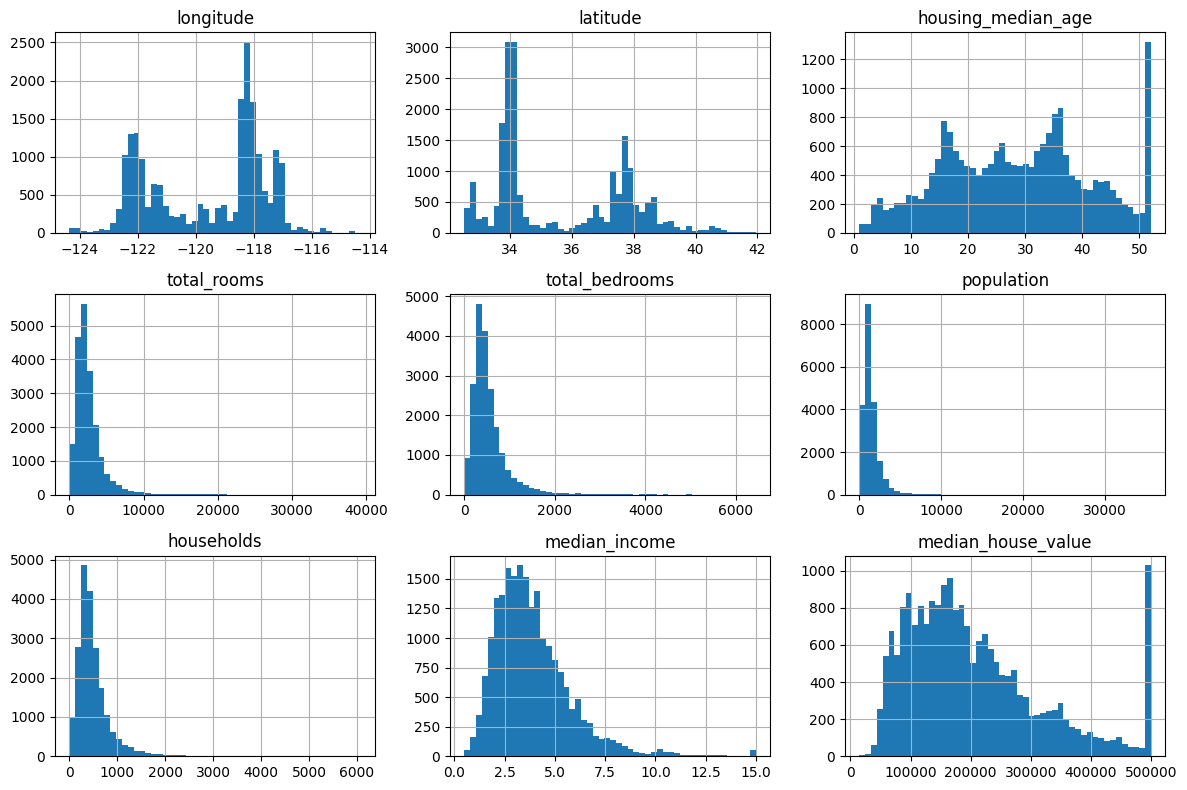

In [5]:
import matplotlib.pyplot as plt
# [EDA]
# há distribuições assimétricas
# os dados estão desbalanceados

df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

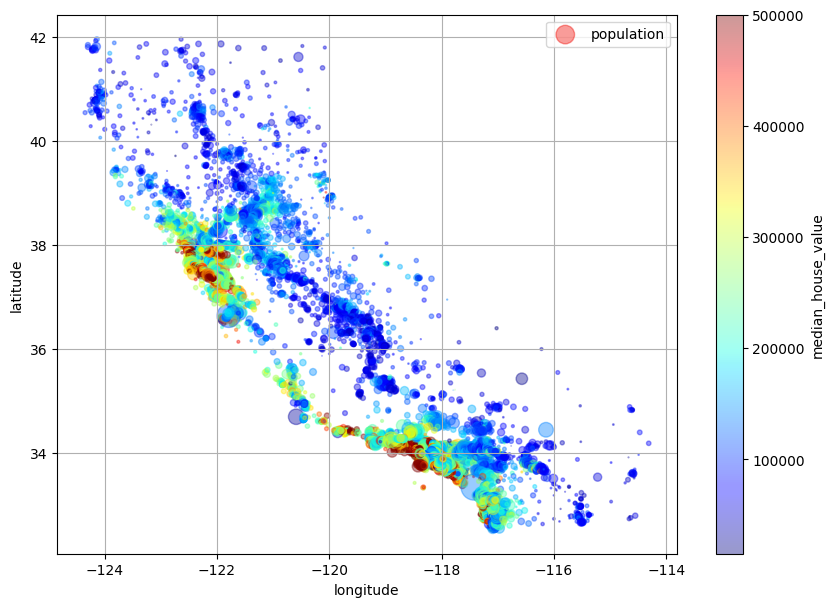

In [6]:
# [EDA]
scaled_population = df["population"] / 100
df.plot(
    kind="scatter", x="longitude", y="latitude", grid=True,
    s = scaled_population, label="population",
    c="median_house_value", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7),alpha=0.4)
plt.show()

In [7]:
# [EDA]
df.drop('ocean_proximity', axis=1).corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [8]:
# [Imputação de dados faltantes]
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

In [9]:
# [Criação de novas variáveis]
df["rooms_per_house"] = df["total_rooms"] / df["households"]

In [10]:
# [Seleção de variáveis]
df.drop(['total_rooms'], axis=1, inplace=True)

In [11]:
# [Transformação]
# [Codificação de categórica]
dummies = pd.get_dummies(df['ocean_proximity'])
dummies.drop('INLAND', axis=1, inplace=True)
df[dummies.columns] = dummies
df.drop('ocean_proximity', axis=1, inplace=True)

In [12]:
# [Transformação]
# [Escala]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('median_house_value', axis=1))
cols = [
    'longitude', 'latitude', 'housing_median_age', 'total_bedrooms',
    'population', 'households', 'median_income', 'rooms_per_house', 
    '<1H OCEAN', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
target = df['median_house_value']
df = pd.DataFrame(X, columns=cols)
df['median_house_value'] = target

In [13]:
# [Separação de treino e teste]
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1) # variáveis predidotas
y = df['median_house_value'] # variável de interesse

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
# [Seleção de modelo]
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
model = RandomForestRegressor()

In [16]:
# [Treinar o modelo]
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# [Prever no conjunto de teste]
y_pred = model.predict(X_test)

In [18]:
# [Avaliar o modelo]
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, y_test)

32339.654198158914

# KAGGLE

In [17]:
import pandas as pd
df_train = pd.read_csv('../datasets/california_housing_kaggle/train.csv')
df_test = pd.read_csv('../datasets/california_housing_kaggle/test.csv')

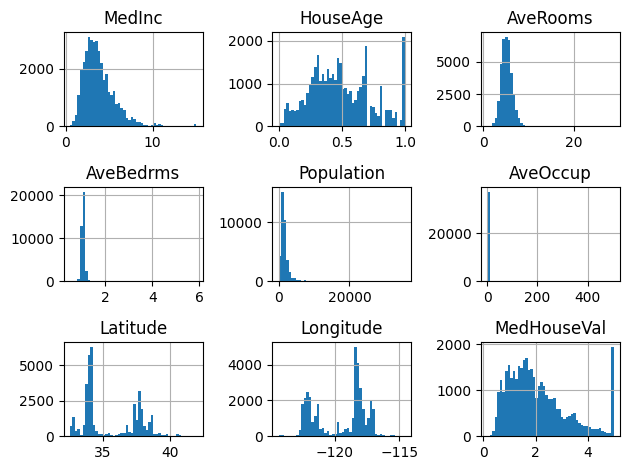

In [27]:
import matplotlib.pyplot as plt
df_train.hist(bins=50)
plt.tight_layout()
plt.show()

In [18]:
ha = df_train['HouseAge']
df_train['HouseAge'] = (ha - ha.min()) / (ha.max() - ha.min()) 

In [19]:
ha = df_test['HouseAge']
df_test['HouseAge'] = (ha - ha.min()) / (ha.max() - ha.min()) 

In [20]:
df_train.drop('id', axis=1, inplace=True)

In [21]:
from sklearn.model_selection import train_test_split
X = df_train.drop('MedHouseVal', axis=1) # variáveis predidotas
y = df_train['MedHouseVal'] # variável de interesse

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import Ridge

model = Ridge()

In [23]:
model.fit(X_train, y_train)

Ridge()

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test, squared=True)

0.5597481065755106

In [37]:
pd.DataFrame({
    'id': df_test['id'],
    'MedHouseVal': model.predict(df_test.drop('id', axis=1))
}).to_csv('submissao_v3_aula.csv', index=None)

In [ ]:
0.60
0.58